# Commonly plots using Seaborn from Python

This script shows 10 commonly plots using Seaborn library from Python.
1. Bar Plots
2. Count Plots
3. Histograms
4. Cat Plots (Box, Violin, Swarm, Boxen)
5. Multiple Plots using FacetGrid
6. Joint Plots
7. KDE Plots
8. Pairplots
9. Heatmaps
10. Scatter Plots

- Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

- Import datasets

In [4]:
exercise = sns.load_dataset('exercise')
iris = sns.load_dataset('iris')
penguins = sns.load_dataset('penguins')
mpg = sns.load_dataset('mpg')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

# 1) Bar plots

Bar plots offer a means to visually represent diverse data sets, including counts, frequencies, percentages, or averages.

They prove especially valuable for illustrating and contrasting data across various categories.






In [20]:
titanic.head(5)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

- Categorical comparison

C:\Users\saulo\AppData\Local\Temp\ipykernel_3664\439085132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x='who', y='age', estimator='mean', errorbar=None, palette='viridis')
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\U

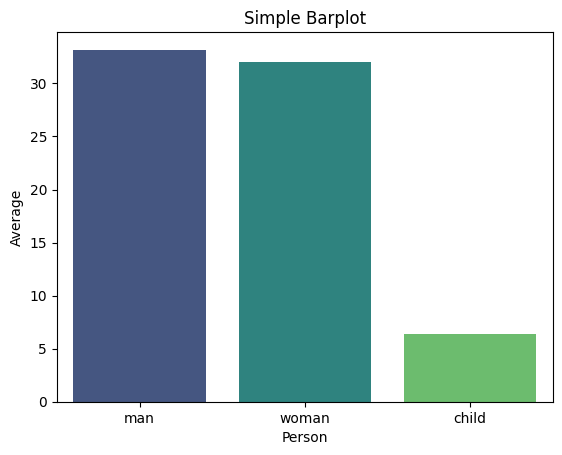

In [23]:
# Simple bar plot
sns.barplot(data=titanic, x='who', y='age', estimator='mean', errorbar=None, palette='viridis')
plt.title('Simple Barplot')
plt.xlabel('Person')
plt.ylabel('Average')
plt.show()

- Proportional Representation through Stacked Bar Charts

In [36]:
# prepare dataset - groupby
data = titanic.groupby('embark_town').agg({'who':'count','sex': lambda x: (x=='male').sum()}).reset_index()
data.rename(columns={'who':'total', 'sex':'male'}, inplace=True)
data.sort_values('total', inplace=True)


embark_town  total  male
1   Queenstown     77    41
0    Cherbourg    168    95
2  Southampton    644   441

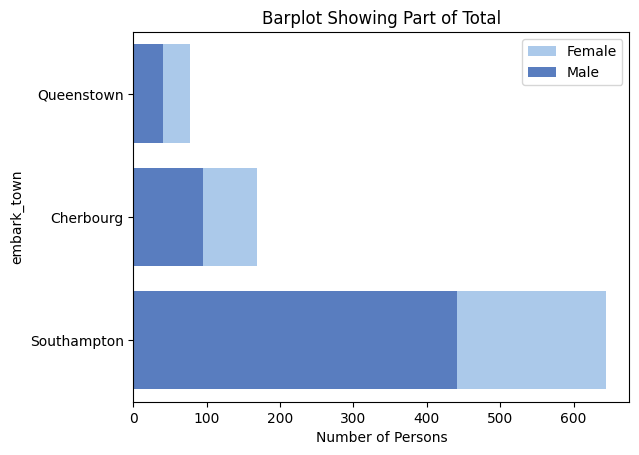

In [44]:
# Barplot Showing Part of Total
sns.set_color_codes("pastel")
sns.barplot(x="total", y="embark_town", data=data,
            label="Female", color="b")  
sns.set_color_codes("muted")
sns.barplot(x="male", y="embark_town", data=data,
            label="Male", color="b")  
plt.title('Barplot Showing Part of Total')
plt.xlabel('Number of Persons')
plt.legend(loc='upper right')
plt.show()

- Comparison of Subcategories within each category through Clustered Bar Plots

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


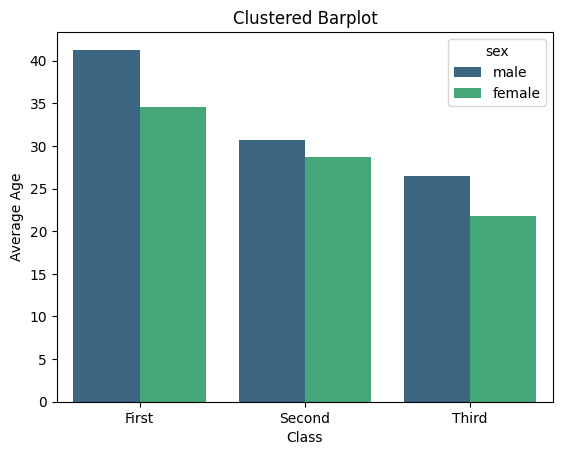

In [49]:
# Clustered barplot
sns.barplot(data=titanic, x='class', y='age', hue='sex', estimator='mean', errorbar=None, palette='viridis')
plt.title('Clustered Barplot')
plt.xlabel('Class')
plt.ylabel('Average Age')
plt.show()

# 2) Count plots

A count plot exhibits the occurrences of each category within a categorical variable.

On the x-axis lie the variable's categories, while the y-axis displays the count or frequency of each category.

- Frequency Distribution of categorical variables

C:\Users\saulo\AppData\Local\Temp\ipykernel_3664\1076042103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='alive', palette='viridis')
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


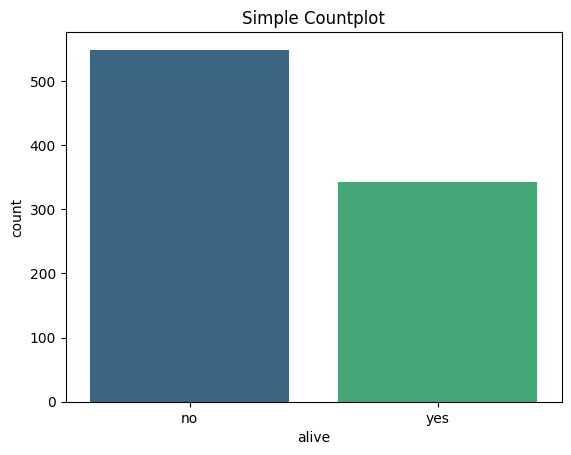

In [50]:
# Simple Countplot
sns.countplot(data=titanic, x='alive', palette='viridis')
plt.title('Simple Countplot')
plt.show()

- Relationship between different categorical variables

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


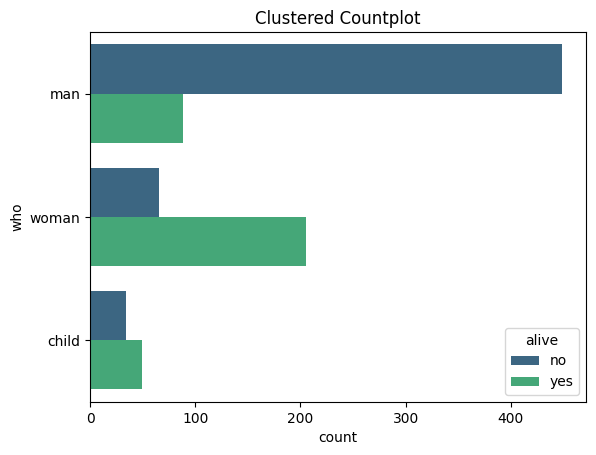

In [51]:
# Clustered Countplot
sns.countplot(data=titanic, y="who", hue="alive", palette='viridis')
plt.title('Clustered Countplot')
plt.show()

# 3) Histograms

Histograms visually depict the distribution of a dataset, offering insights into its key characteristics such as normality, skewness, or presence of multiple peaks.

They showcase the frequency or count of observations across various intervals or "bins" of the data.

Let's use iris dataset.

In [54]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

- Visualize the shape, centre, range and spread of a continuous/numeric variable and to identify any patterns or outliers

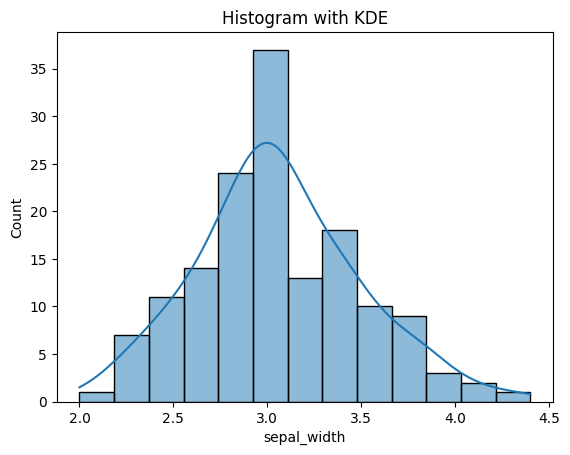

In [53]:
# Histogram with KDE
sns.histplot(data=iris, x='sepal_width', kde=True)
plt.title('Histogram with KDE')
plt.show()

-  Compare the distribution of many continuous variables

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


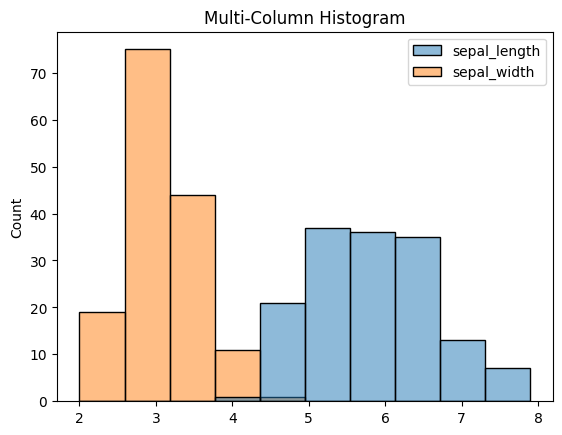

In [57]:
# Histogram with multiple features
sns.histplot(data=iris[['sepal_length','sepal_width']])
plt.title('Multi-Column Histogram')
plt.show()

- Compare the distribution of a continuous variable for different categories

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Lo

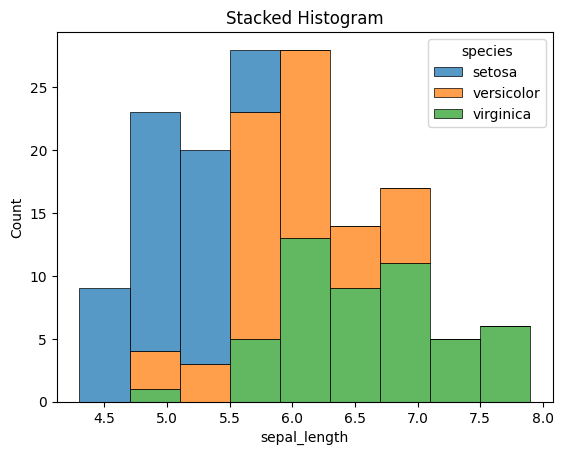

In [63]:
sns.histplot(iris, x='sepal_length', hue='species', multiple='stack', linewidth=0.5)
plt.title('Stacked Histogram')
plt.show()

# 4) Cat Plots (Box, Violin, Swarm, Boxen)


Catplot is a flexible higher-level function that integrates various categorical seaborn plots including boxplots, violinplots, swarmplots, pointplots, barplots, and countplots.

Now, let's use tips dataset.

In [64]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

- Boxplot

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\categorical.py:640: FutureWar

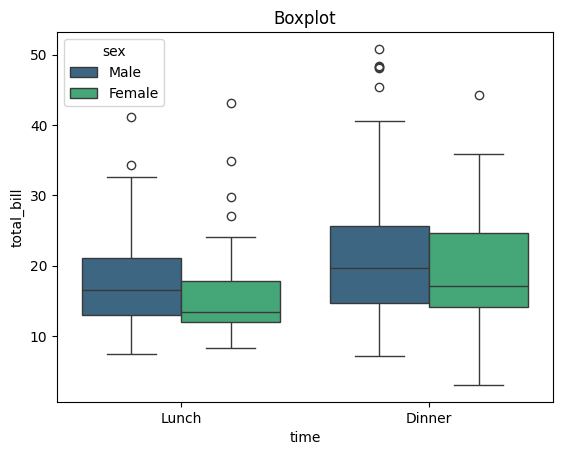

In [65]:
# Boxplot
sns.boxplot(data=tips, x='time', y='total_bill', hue='sex', palette='viridis')
plt.title('Boxplot')
plt.show()

- Violin plot

C:\Users\saulo\AppData\Local\Temp\ipykernel_3664\2838546326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tips, x='day', y='total_bill', palette='viridis')


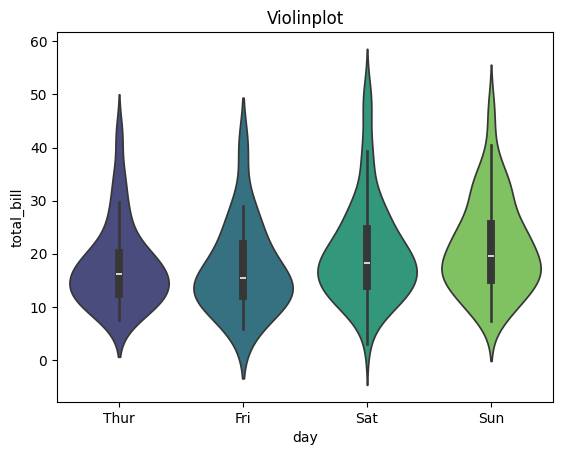

In [66]:
# Violinplot
sns.violinplot(data=tips, x='day', y='total_bill', palette='viridis')
plt.title('Violinplot')
plt.show()

- Swarm plot

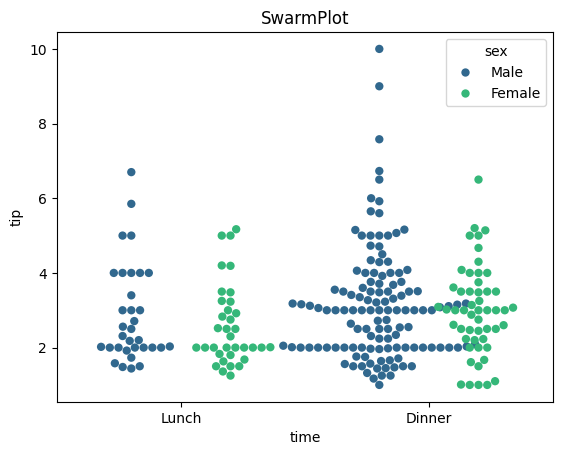

In [67]:
sns.swarmplot(data=tips, x='time', y='tip', dodge=True, palette='viridis', hue='sex', s=6)
plt.title('SwarmPlot')
plt.show()

- StripPlot


c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


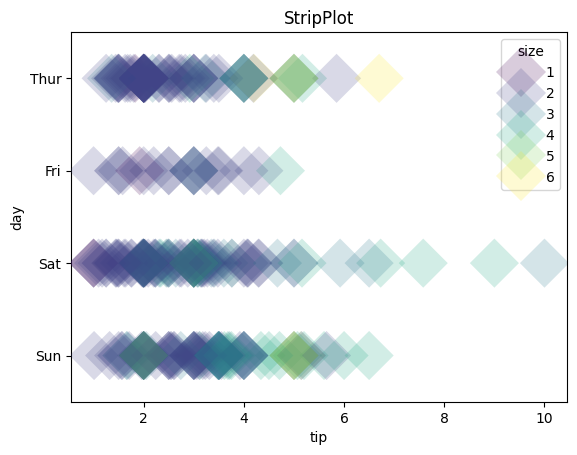

In [68]:
#StripPlot
sns.stripplot(data=tips, x='tip', hue='size', y='day', s=25, alpha=0.2, jitter=False, marker='D',palette='viridis')
plt.title('StripPlot')
plt.show()

# 5) Multiple Plots using FacetGrid


FacetGrid, a component of the seaborn library, enables the creation of multiple data subsets arranged in a grid format. Each plot within the grid represents a specific category, determined by the column names specified in the 'col' and 'row' attributes of FacetGrid().

The plots within the grid can encompass various plot types supported by seaborn, including scatter plots, line plots, bar plots, and histograms.

For example, we utilized exercise dataset

In [69]:
exercise.head()

Unnamed: 0  id     diet  pulse    time  kind
0           0   1  low fat     85   1 min  rest
1           1   1  low fat     85  15 min  rest
2           2   1  low fat     88  30 min  rest
3           3   2  low fat     90   1 min  rest
4           4   2  low fat     92  15 min  rest

- Boxplots for pulse rate during different activities

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


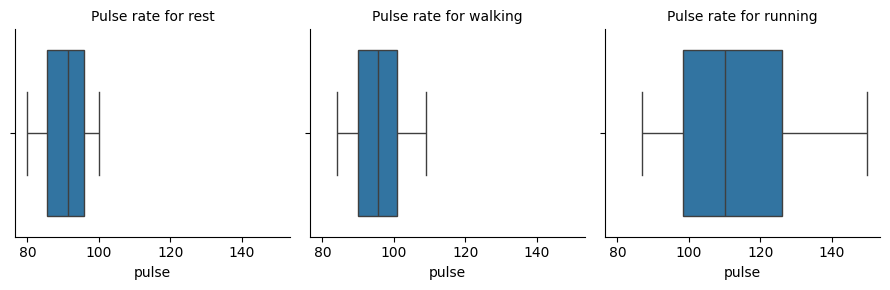

In [76]:
# Creating subplots using FacetGrid
g = sns.FacetGrid(exercise, col='kind', palette='Paired')

# Drawing a plot on every facet
g.map(sns.boxplot, 'pulse')
g.set_titles(col_template="Pulse rate for {col_name}")


- Scatter plots for flipper length and body mass of Penguins from different islands

For this plot, we utilized penguins dataset

In [70]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

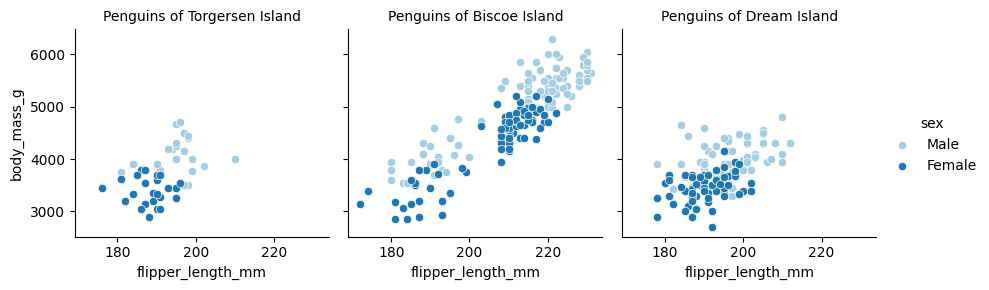

In [79]:
# Creating subplots using FacetGrid
g = sns.FacetGrid(penguins, col='island', hue='sex', palette='Paired')

# Drawing a plot on every facet
g.map(sns.scatterplot, 'flipper_length_mm', 'body_mass_g')
g.set_titles(template="Penguins of {col_name} Island")
g.add_legend()

# 6) Joint Plots


A joint plot consolidates various univariate and bivariate plots within one figure. The focal point usually features a scatter plot or a hexbin plot, illustrating the joint distribution of the two variables.

Alongside, additional plots along the axes, such as histograms or Kernel Density Estimations (KDEs), depict the individual distributions of each variable.

Let's use mpg dataset to see some examples.

- Comparison of the displacement and mpg for cars

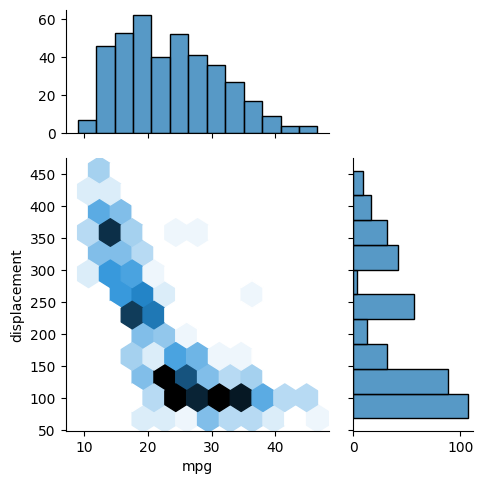

In [80]:
# Hex Plot with Histogram margins
sns.jointplot(x="mpg", y="displacement", data=mpg, height=5, kind='hex', ratio=2, marginal_ticks=True)

- Comparison of acceleration and horsepower for cars from different countries

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Lo

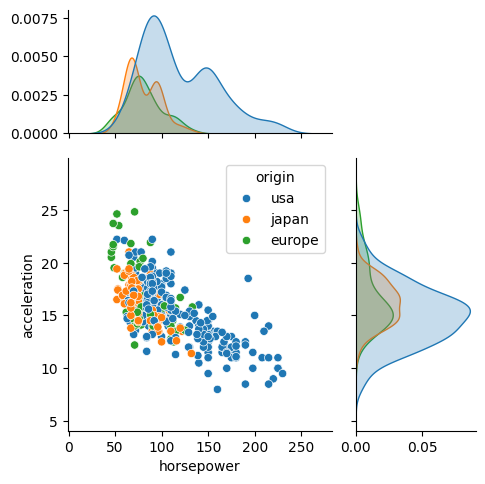

In [81]:
# Scatter Plot with KDE Margins
sns.jointplot(x="horsepower", y="acceleration", data=mpg, hue="origin", height=5, ratio=2, marginal_ticks=True)

# 7) KDE Plots


A KDE (Kernel Density Estimate) plot is a smoothed rendition of a histogram, showcasing the probability density function of a continuous random variable.

The y-axis denotes the density or probability of observing a specific value of the variable, while the x-axis signifies the values of the variable itself.

- Comparing the horsepower of cars with respect to number of cylinders

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


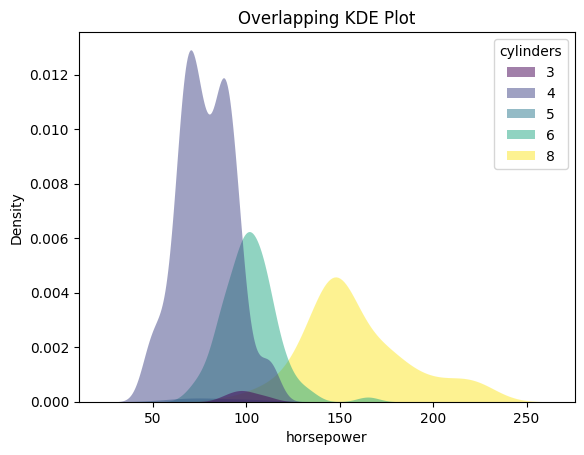

In [83]:
#Overlapping KDE Plots
sns.kdeplot(data=mpg, x='horsepower', hue='cylinders', fill=True,
           palette='viridis', alpha=.5, linewidth=0)
plt.title('Overlapping KDE Plot')
plt.show()

- Comparing the weight of cars across different countries

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Lo

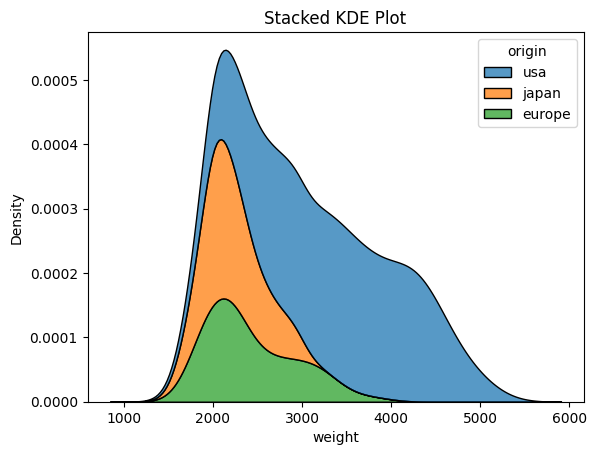

In [84]:
#Stacked KDE Plots
sns.kdeplot(data=mpg, x="weight", hue="origin", multiple="stack")
plt.title('Stacked KDE Plot')
plt.show()

# 8) Pairplots

A pair plot is a visualization technique that enables exploration of relationships between multiple variables within a dataset. It comprises a grid of scatter plots, where each variable is plotted against every other variable.

Along the diagonal, histograms or density plots for each variable illustrate the distribution of values.


- Visualisation of relationship between different features of penguins

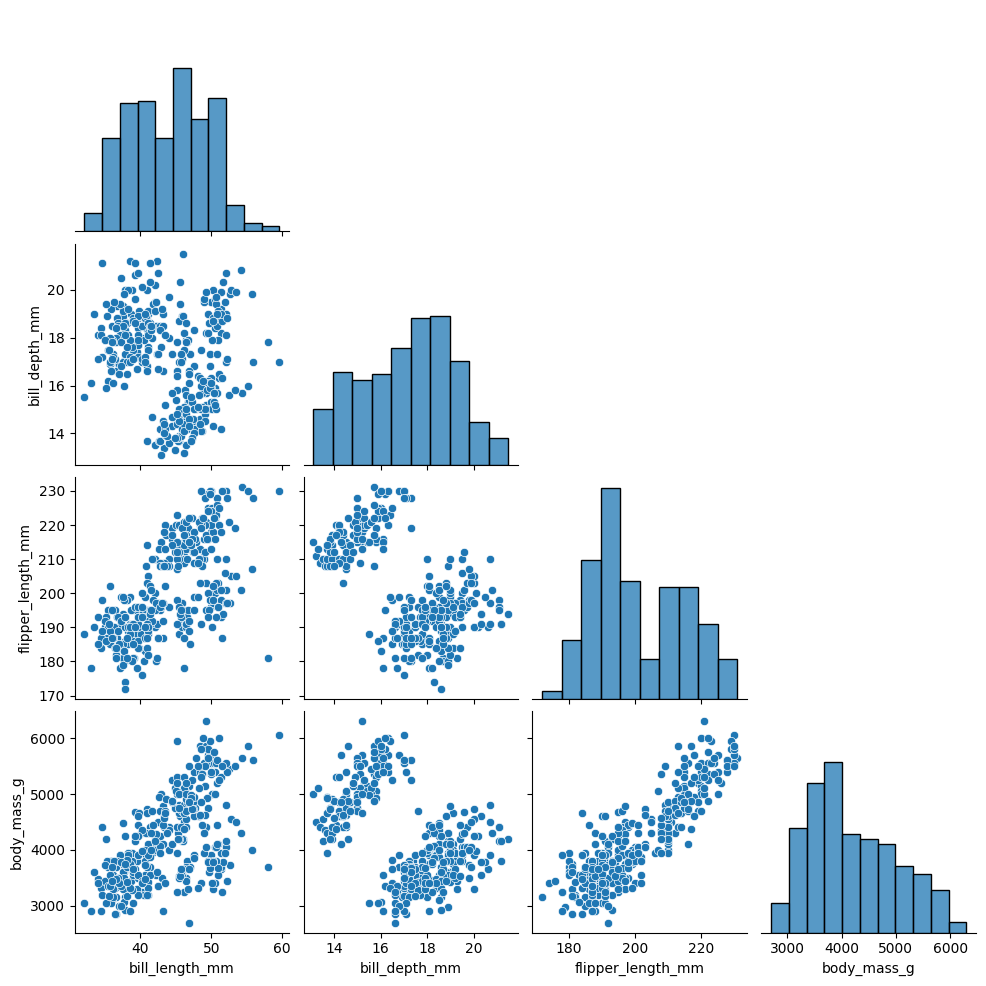

In [85]:
#Simple Pairplot
sns.pairplot(data=penguins, corner=True)

c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Local\r-miniconda\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\saulo\AppData\Lo

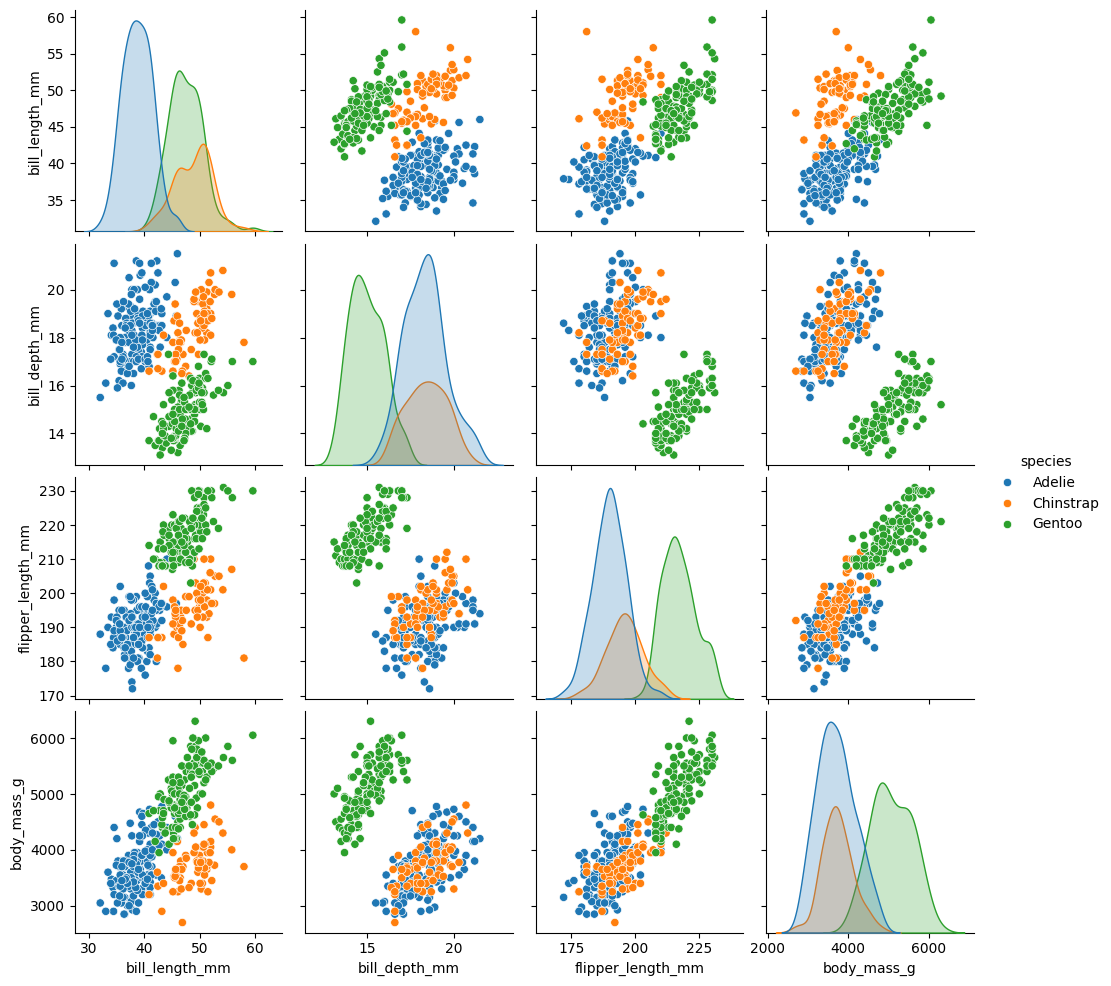

In [86]:
# Pairplot with hues
sns.pairplot(data=penguins, hue='species')

# 9) Heatmaps


Heatmaps serve as visual representations utilizing color-coded cells to exhibit the values within a matrix or data table. 

Within a heatmap, the rows and columns of the matrix represent distinct variables, while the intensity of each cell's color depicts the magnitude or value of the data point at the intersection of those variables.

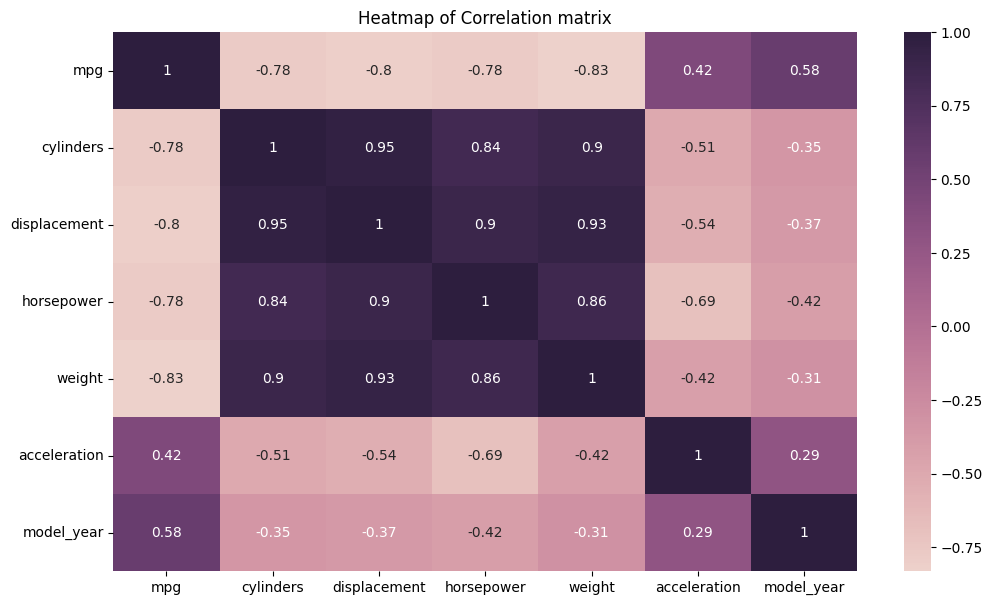

In [87]:
#Selection of numeric columns from the dataset
num_cols = list(mpg.select_dtypes(include='number'))
fig = plt.figure(figsize=(12,7))

#Correlation Heatmap
sns.heatmap(data=mpg[num_cols].corr(), 
            annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Heatmap of Correlation matrix')
plt.show()

# 10) Scatter Plots


A scatterplot illustrates the correlation between two continuous variables by plotting individual data points on a graph, where one variable is depicted on the x-axis and the other on the y-axis. 

The resulting plot displays multiple points scattered across the graph, hence earning the name "scatterplot."

Scatter plots serve several purposes in data analysis and visualization:

- Visualizing Relationships: They help in understanding the relationship between two continuous variables. For example, they can reveal if there's a positive, negative, or no correlation between the variables.

- Identifying Patterns: Scatter plots can help identify patterns or trends in data, such as clusters or outliers, which may not be apparent from summary statistics alone.

- Assessing Correlation: They allow for a quick assessment of the strength and direction of the relationship between variables. Strong correlations often result in a more structured or linear arrangement of points, while weak correlations may result in a more scattered arrangement.

- Checking for Linearity: Scatter plots are useful for assessing whether a linear model is appropriate for the data. If the points form a clear linear pattern, linear regression may be a suitable modeling technique.

- Visualizing Distribution: Scatter plots provide insights into the distribution of data points along both the x-axis and y-axis, which can help in understanding the overall shape of the data distribution.

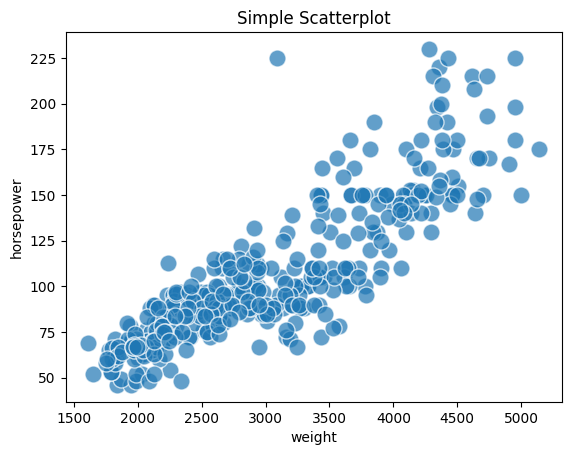

In [88]:
# Simple Scatterplot
sns.scatterplot(data=mpg, x='weight', y='horsepower', s=150, alpha=0.7)
plt.title('Simple Scatterplot')
plt.show()

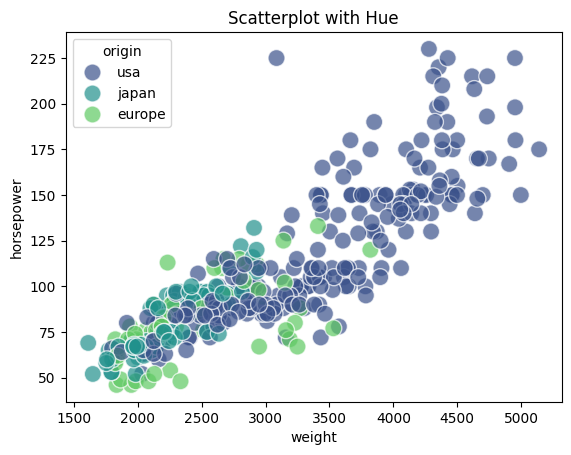

In [89]:
# Scatterplot with Hue
sns.scatterplot(data=mpg, x='weight', y='horsepower', s=150, alpha=0.7,
               hue='origin', palette='viridis')
plt.title('Scatterplot with Hue')
plt.show()

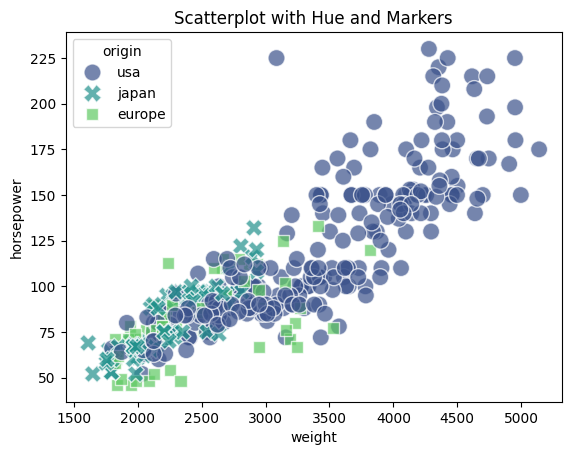

In [90]:
# Scatterplot with Hue and Markers
sns.scatterplot(data=mpg, x='weight', y='horsepower', s=150, alpha=0.7,
              style='origin',palette='viridis', hue='origin')
plt.title('Scatterplot with Hue and Markers')
plt.show()

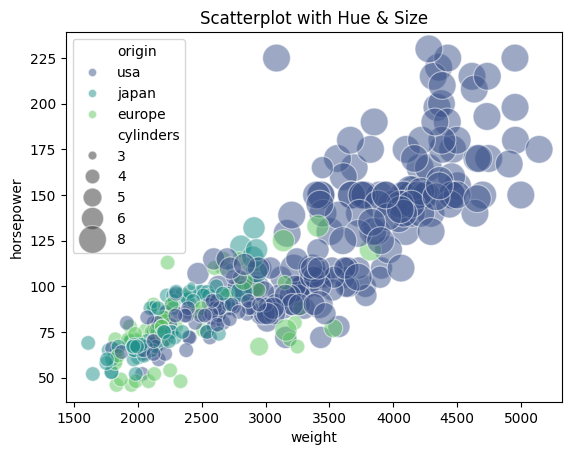

In [91]:
# Scatterplot with Hue & Size
sns.scatterplot(data=mpg, x='weight', y='horsepower', sizes=(40, 400), alpha=.5,
              palette='viridis', hue='origin', size='cylinders')
plt.title('Scatterplot with Hue & Size')
plt.show()

# More details can be seen in the links below:

1. [Bar Plots](https://seaborn.pydata.org/generated/seaborn.barplot.html)

2. [Count Plots](https://seaborn.pydata.org/generated/seaborn.countplot.html)

3. [Histograms](https://seaborn.pydata.org/generated/seaborn.histplot.html)

4. [Cat Plots (Box, Violin, Swarm, Boxen)](https://seaborn.pydata.org/generated/seaborn.catplot.html)

5. [Multiple Plots using FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

6. [Joint Plots](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

7. [KDE Plots](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

8. [Pairplots](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

9. [Heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

10.[ Scatter Plots](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

## References

1 - [Ten Must-Know Seaborn Plots](https://medium.com/@snehabajaj108/ten-must-know-seaborn-plots-1f3a82dc99c5);

2 - [Seaborn: statistical data visualization](https://seaborn.pydata.org/index.html)